<!-- ![title](./Desktop/tokyo-wallpaper.jpg) -->

# SUPERVISED LEARNING (without handling outliers) Recategorize
- by Giovaldi R C

Recategorize adalah mengkategorikan lagi kolom kategorikal yang kurang informatif. Didapati berdasarkan analisa-analisa sebelumnya bahwa terdapat kolom-kolom yang memiliki data kontras seperti ditemukan di property type. Setelah ditelaah lebih dalam ternyata banyak ditemukan pengkategorian yang bisa dikelompokkan lagi. 

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import joblib
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.compose import ColumnTransformer
from feature_engine.outlier_removers import Winsorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from collections import Counter
import scipy.stats as ss
import math
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [2]:
print('numpy version:', np.__version__,'per Agustus 2020')
print('pandas version:', pd.__version__,'per Agustus 2020')
print('scikit-learn version:', sklearn.__version__,'per Agustus 2020')

numpy version: 1.19.1 per Agustus 2020
pandas version: 1.1.0 per Agustus 2020
scikit-learn version: 0.23.1 per Agustus 2020


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Import Data

In [4]:
airbnbl = pd.read_csv('./Desktop/airbnb__1.csv')

In [5]:
airbnbl.head()

,host_id,name,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,host_since,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,longitude,latitude,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,"La Casa Gaienmae C Harajuku, Omotesando is nearby",f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,2010-06-25,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,0.18,94.0,89,1,1.0,1.0,1,139.71203,35.67152,100.0,96.488942,4192.0,30000.0,5000.0,0.0
1,964081,Oshiage Holiday Apartment,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Sumida Ku,2011-08-13,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130003350,f,moderate,1.56,95.0,270,1,2.0,1.0,2,139.82596,35.71721,86.0,100.000000,10965.0,40000.0,5000.0,0.0
2,341577,Private apt in central Tokyo #203,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Wifi,""Air conditioning"",Kitchen,""Hot tub"",...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.17,95.0,242,1,1.0,1.0,2,139.65810,35.74267,82.0,100.000000,4192.0,32250.0,5375.0,1075.0
3,1573631,"Cozy flat #203, local area YET 10 mins to shib...",t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,2012-01-06,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called Setagaya ku hokenjo ...,f,moderate,1.37,95.0,364,1,1.0,0.0,2,139.65707,35.66443,92.0,100.000000,6987.0,20000.0,6000.0,0.0
4,341577,Private apt in central Tokyo #201,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.12,96.0,353,1,1.0,1.0,2,139.65832,35.74264,82.0,100.000000,3977.0,32250.0,5375.0,1075.0


In [6]:
airbnbl.shape 

(12600, 28)

In [7]:
airbnbl.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [8]:
airbnb_describe =[]

for i in airbnbl.columns:
    airbnb_describe.append([
        i,
        airbnbl[i].dtypes,
        airbnbl[i].isna().sum(),
        round((((airbnbl[i].isna().sum())/(len(airbnbl)))*100),2),
        airbnbl[i].nunique(),
        airbnbl[i].unique()
    ])

In [9]:
DESC = pd.DataFrame(airbnb_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,host_id,int64,0,0.0,3236,"[151977, 964081, 341577, 1573631, 4799233, 484..."
1,name,object,0,0.0,11669,"[La Casa Gaienmae C Harajuku, Omotesando is ne..."
2,host_is_superhost,object,0,0.0,2,"[f, t]"
3,host_verifications,object,0,0.0,203,"[['email', 'phone', 'facebook', 'reviews', 'ju..."
4,host_identity_verified,object,0,0.0,2,"[t, f]"
5,neighbourhood_cleansed,object,0,0.0,55,"[Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku..."
6,host_since,object,0,0.0,1638,"[2010-06-25, 2011-08-13, 2011-01-10, 2012-01-0..."
7,property_type,object,0,0.0,28,"[Apartment, House, Serviced apartment, Condomi..."
8,room_type,object,0,0.0,4,"[Private room, Entire home/apt, Shared room, H..."
9,amenities,object,0,0.0,9182,"[{TV,Internet,Wifi,Kitchen,""Paid parking off p..."


In [10]:
airbnb= airbnbl[(airbnbl['availability_365']<=180)&(airbnbl['availability_365']!=0)]

In [11]:
airbnb.dtypes

host_id                     int64
name                       object
host_is_superhost          object
host_verifications         object
host_identity_verified     object
neighbourhood_cleansed     object
host_since                 object
property_type              object
room_type                  object
amenities                  object
license                    object
instant_bookable           object
cancellation_policy        object
reviews_per_month         float64
review_scores_rating      float64
availability_365            int64
guests_included             int64
beds                      float64
bedrooms                  float64
accommodates                int64
longitude                 float64
latitude                  float64
host_acceptance_rate      float64
host_response_rate        float64
price                     float64
security_deposit          float64
cleaning_fee              float64
extra_people              float64
dtype: object

# HANDLING OUTLIERS

## Discover outliers with visualization tools : 
  - Box plot =  is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.
  - QQ plot
  - Histogram

## Working with Outliers: Correcting, Removing, Leave it
  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://www.udemy.com/course/feature-engineering-for-machine-learning/learn/lecture/8749894#announcements

https://www.slideshare.net/rizka_safa/momen-kemiringan-dankeruncingan7

In [12]:
airbnb.skew()

host_id                 -0.106253
reviews_per_month        2.590106
review_scores_rating    -2.784883
availability_365        -0.162022
guests_included          2.492380
beds                     5.446727
bedrooms                13.273677
accommodates             1.645852
longitude               -2.233014
latitude               -17.016600
host_acceptance_rate    -5.328615
host_response_rate      -5.698404
price                   12.643910
security_deposit        11.368452
cleaning_fee             2.350679
extra_people             4.650069
dtype: float64

In [13]:
airbnb.kurt()

host_id                  -1.265011
reviews_per_month        23.526141
review_scores_rating     13.857967
availability_365         -1.017524
guests_included           9.369917
beds                     75.405336
bedrooms                386.730254
accommodates              2.839425
longitude                12.125590
latitude                427.891348
host_acceptance_rate     38.295208
host_response_rate       37.909600
price                   205.558677
security_deposit        164.933897
cleaning_fee             14.885028
extra_people             71.234601
dtype: float64

In [14]:
def diagnostic_plots(airbnb,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(airbnb[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=airbnb[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

In [15]:
airbnb.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

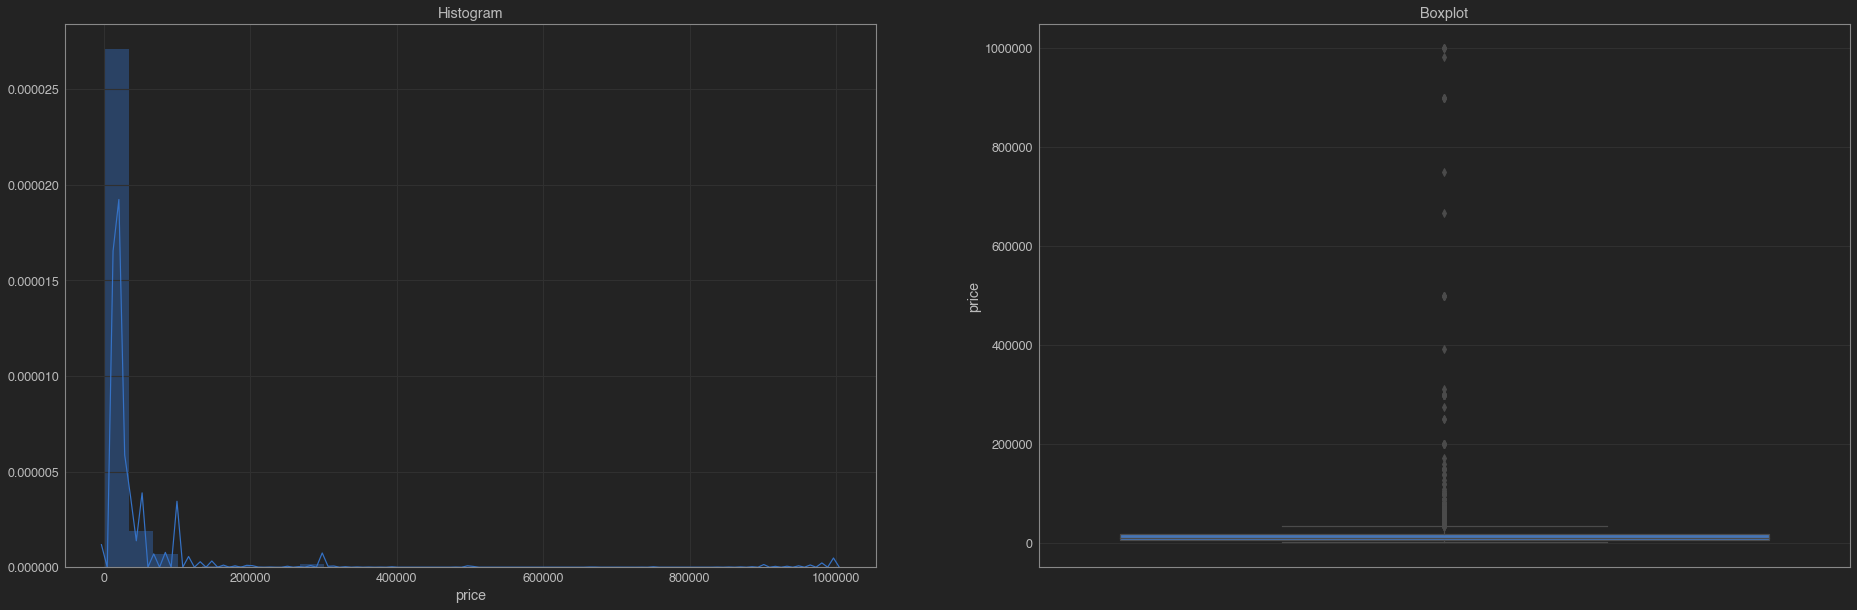

In [16]:
diagnostic_plots(airbnb,'price')

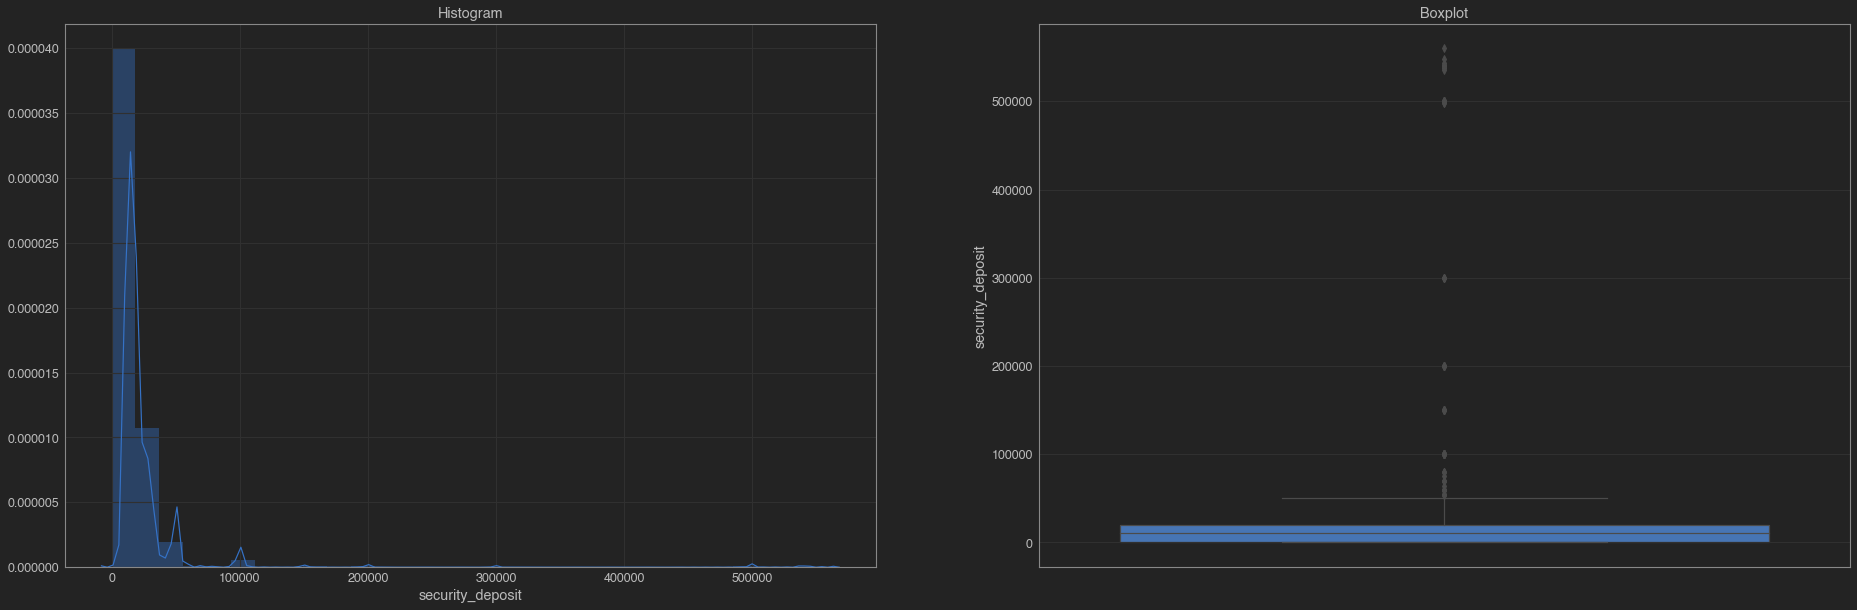

In [17]:
diagnostic_plots(airbnb,'security_deposit')

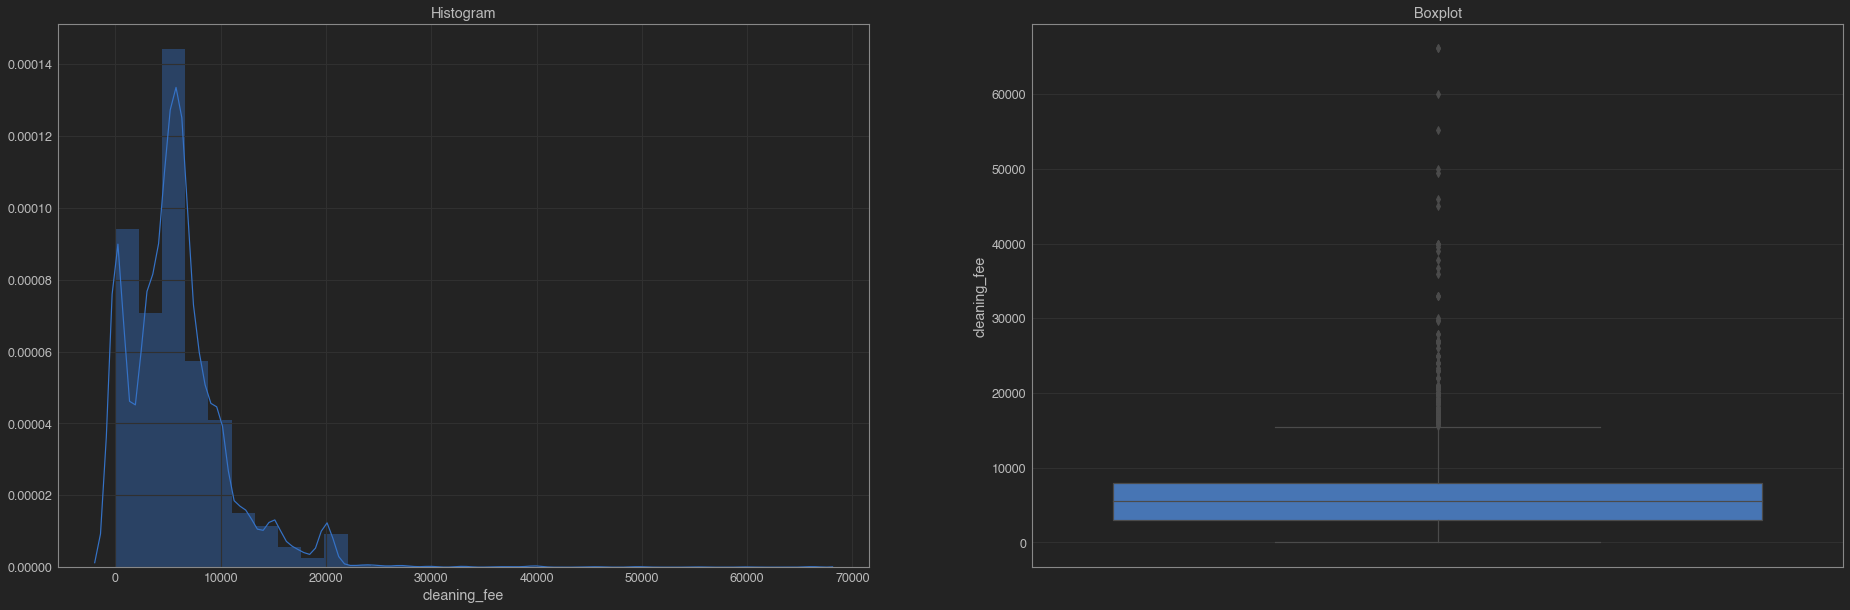

In [18]:
diagnostic_plots(airbnb,'cleaning_fee')

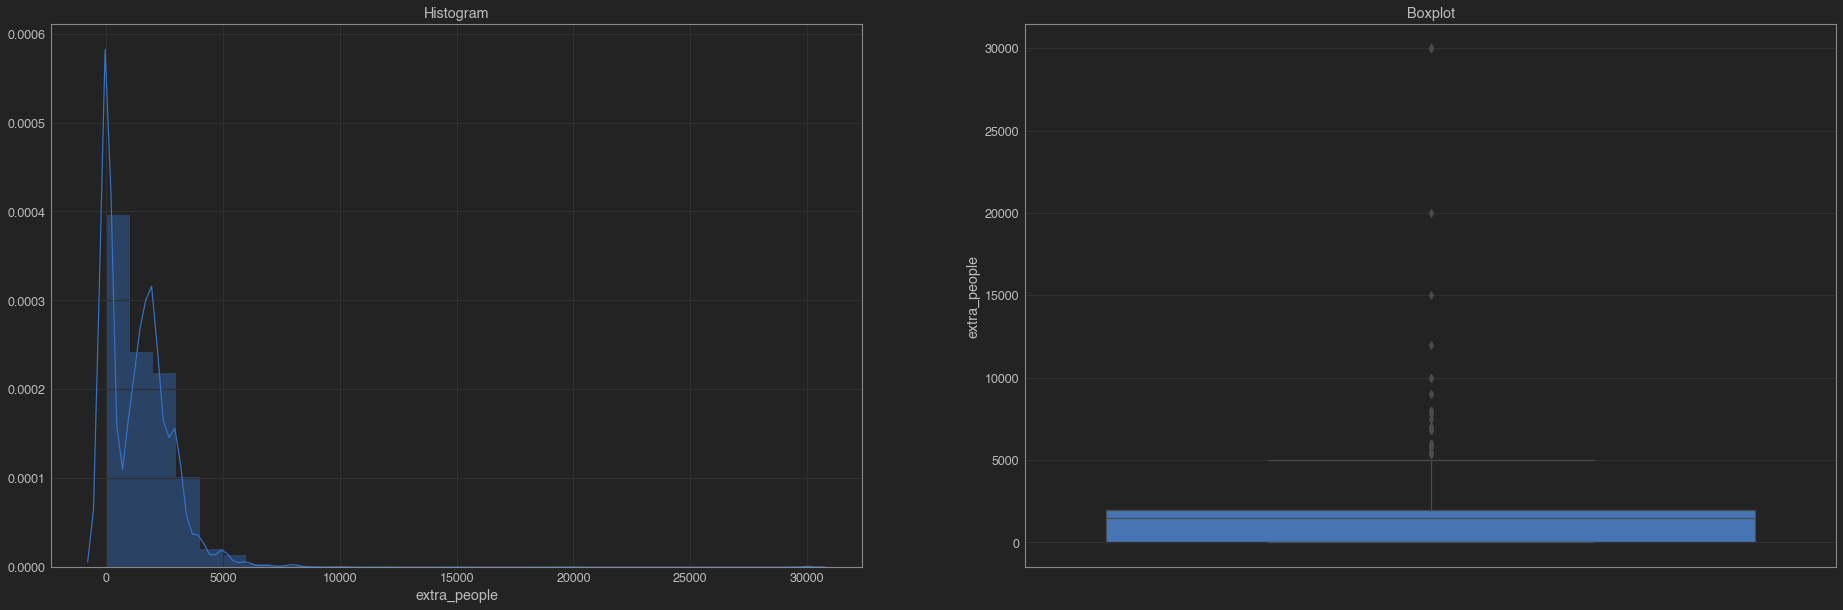

In [19]:
diagnostic_plots(airbnb,'extra_people')

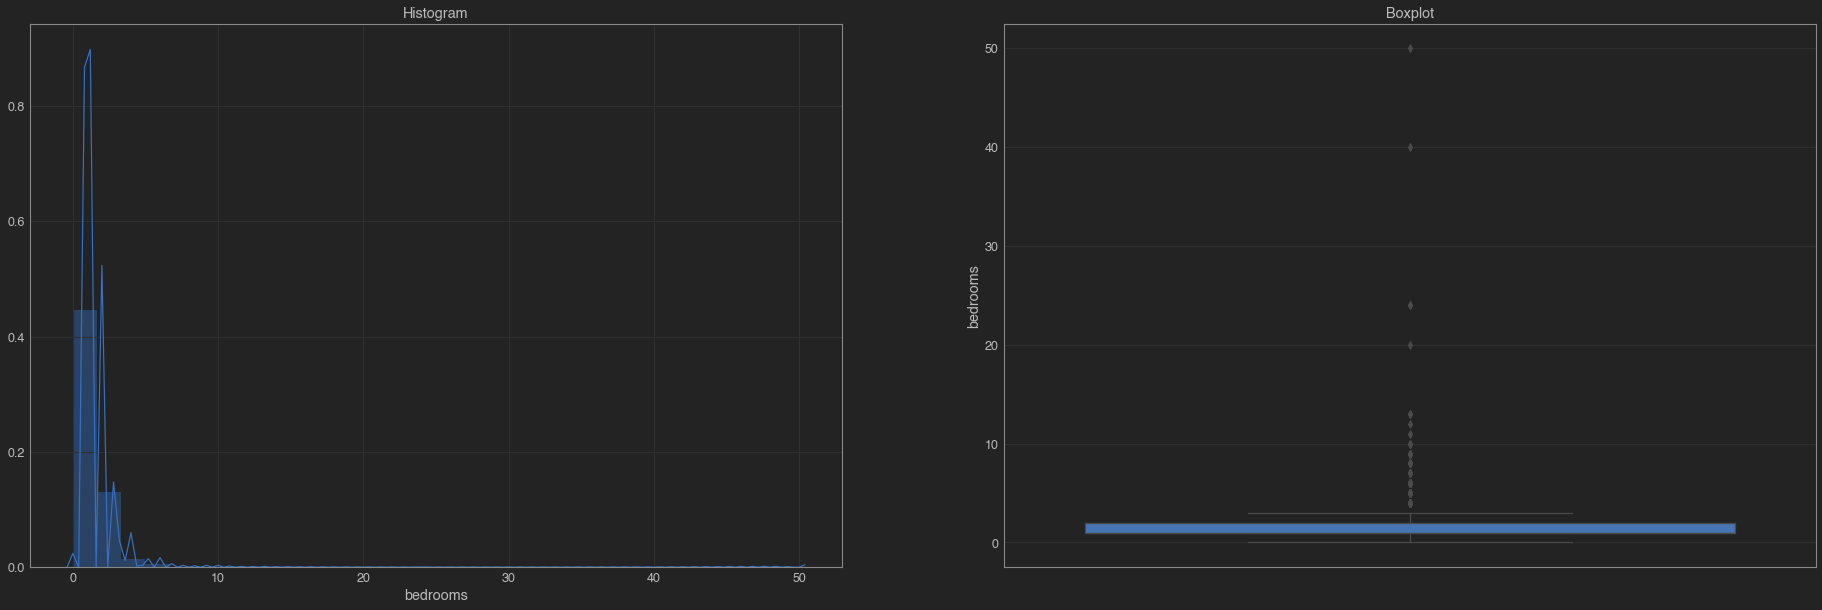

In [20]:
diagnostic_plots(airbnb,'bedrooms')

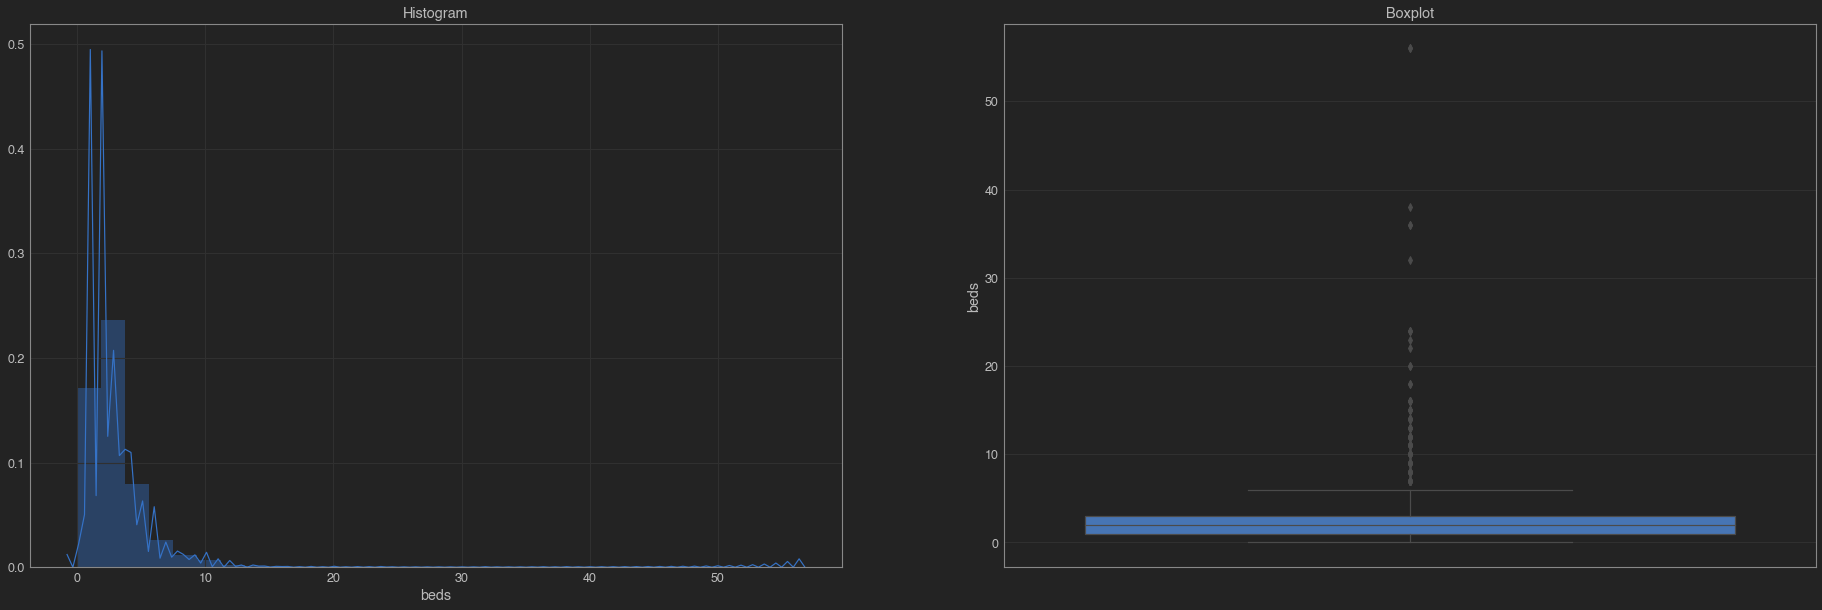

In [21]:
diagnostic_plots(airbnb,'beds')

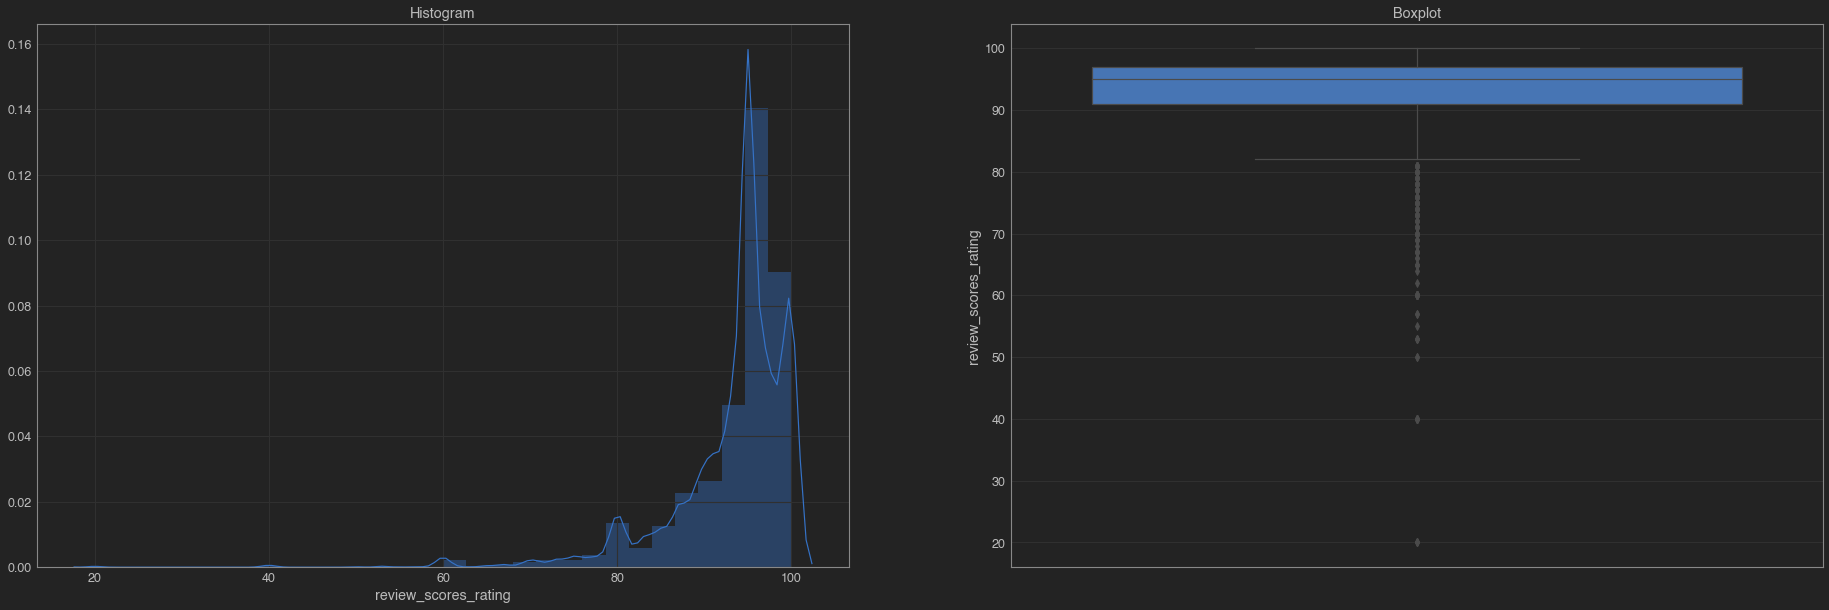

In [22]:
diagnostic_plots(airbnb,'review_scores_rating')

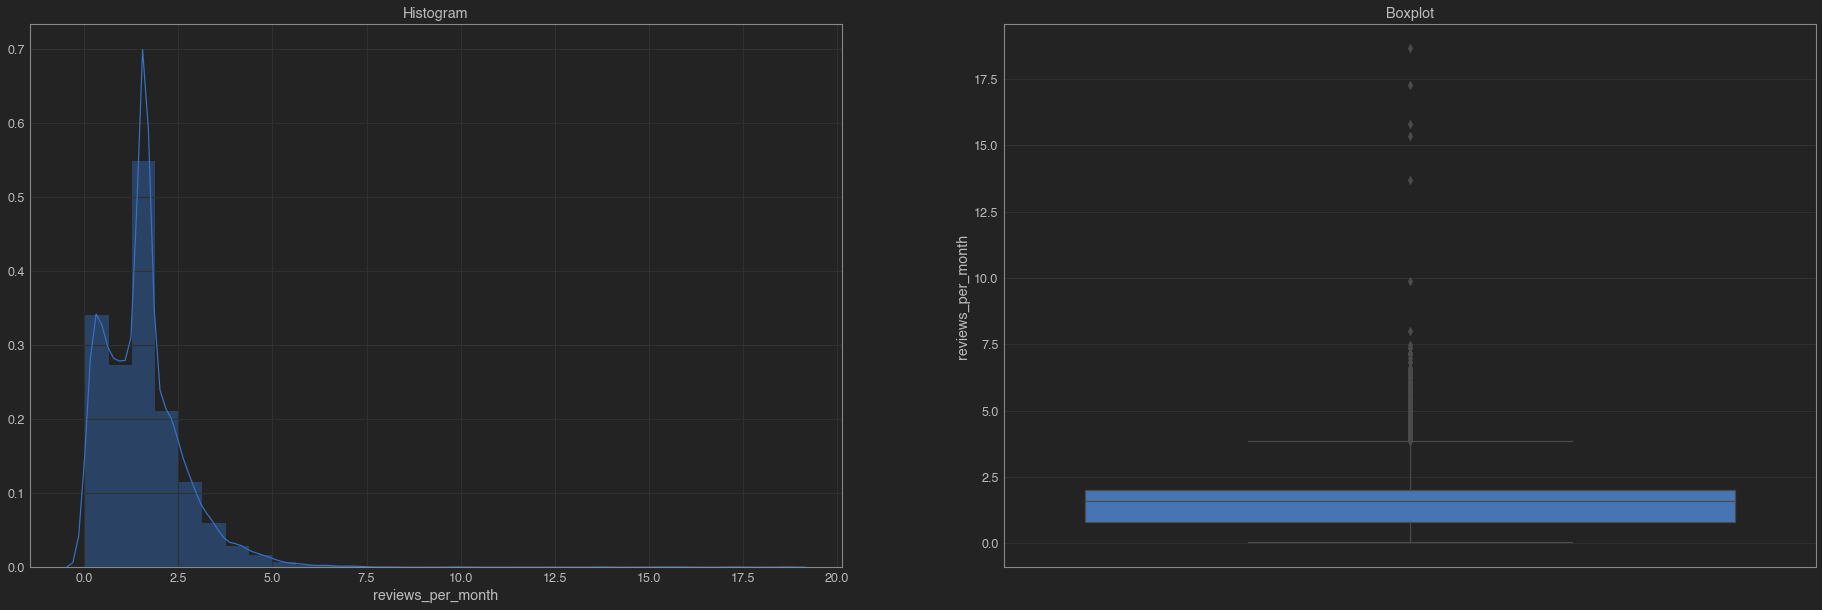

In [23]:
diagnostic_plots(airbnb,'reviews_per_month')

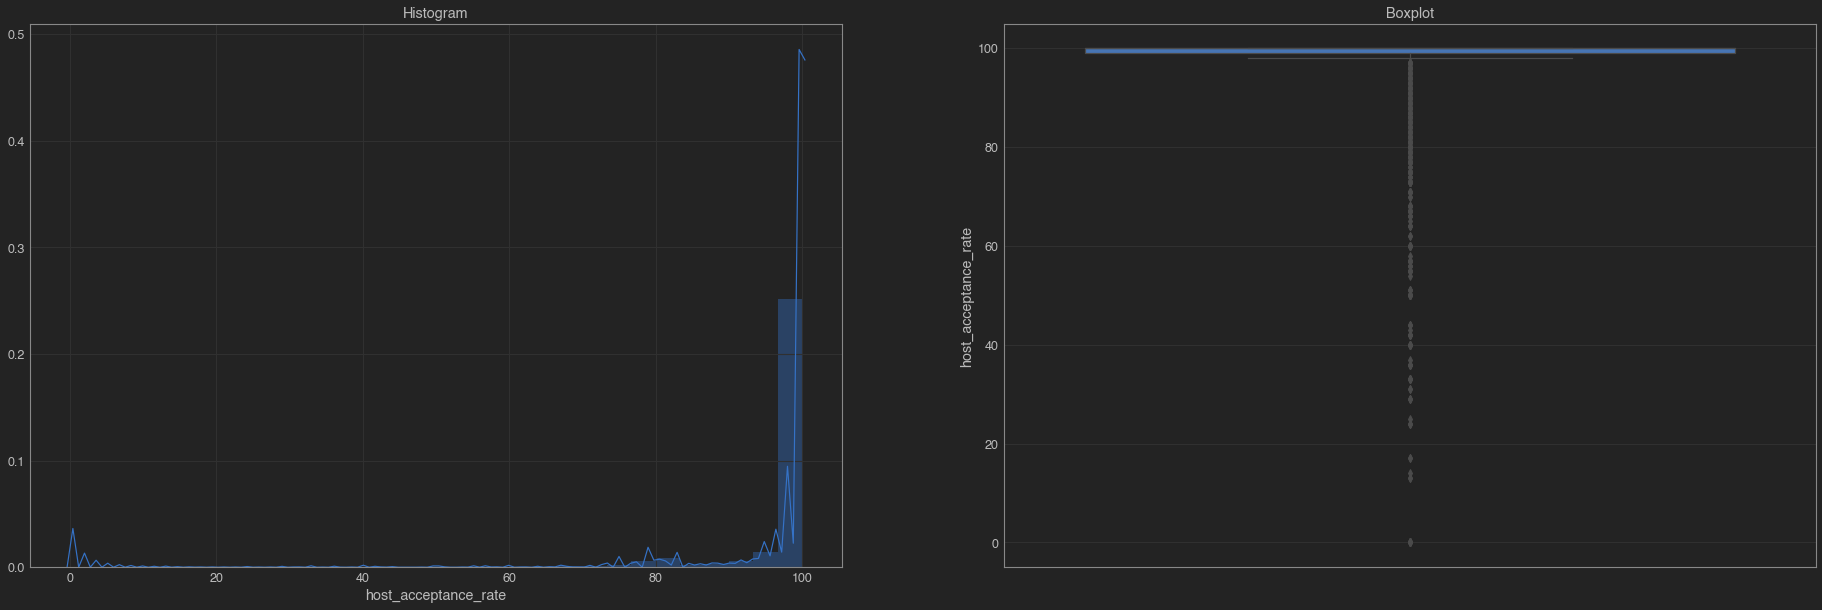

In [24]:
diagnostic_plots(airbnb,'host_acceptance_rate')

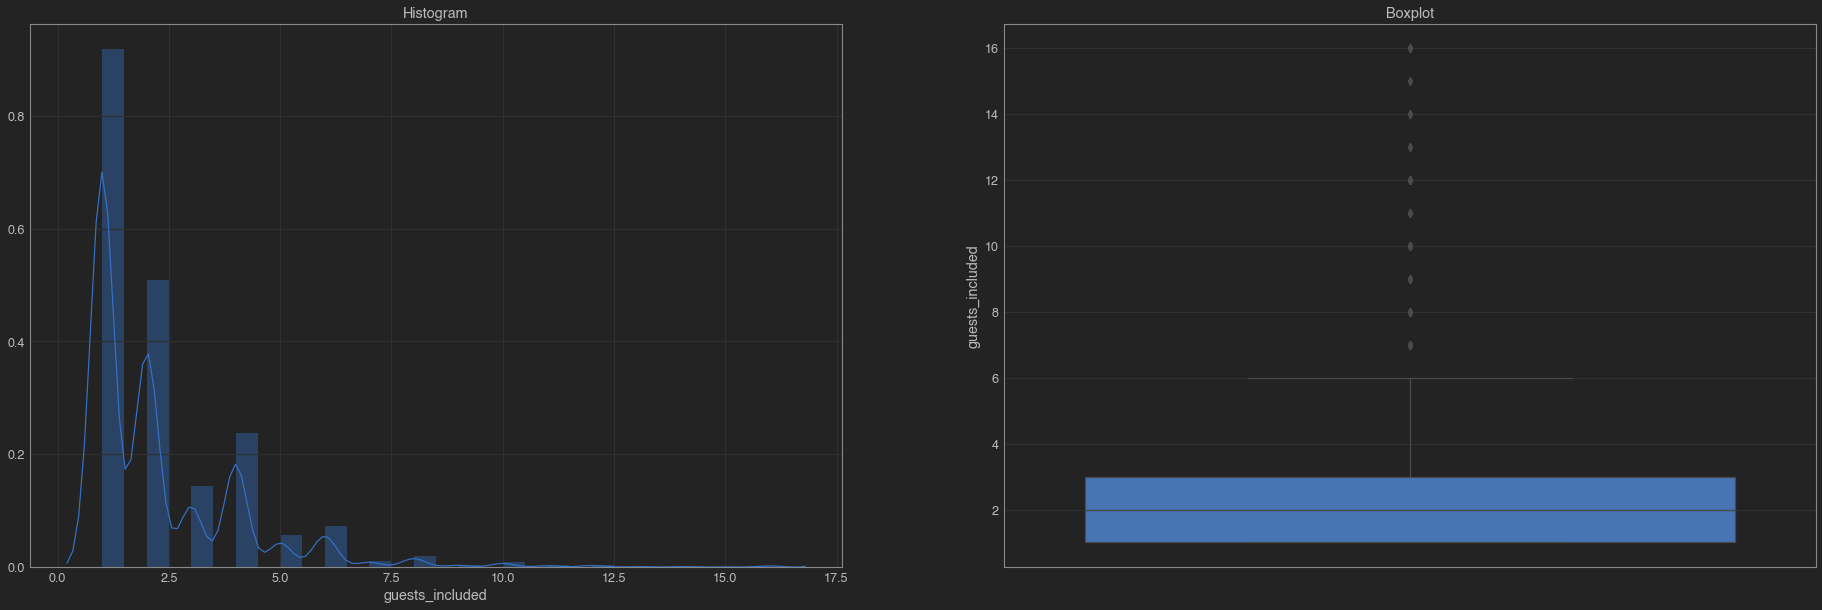

In [25]:
diagnostic_plots(airbnb,'guests_included')

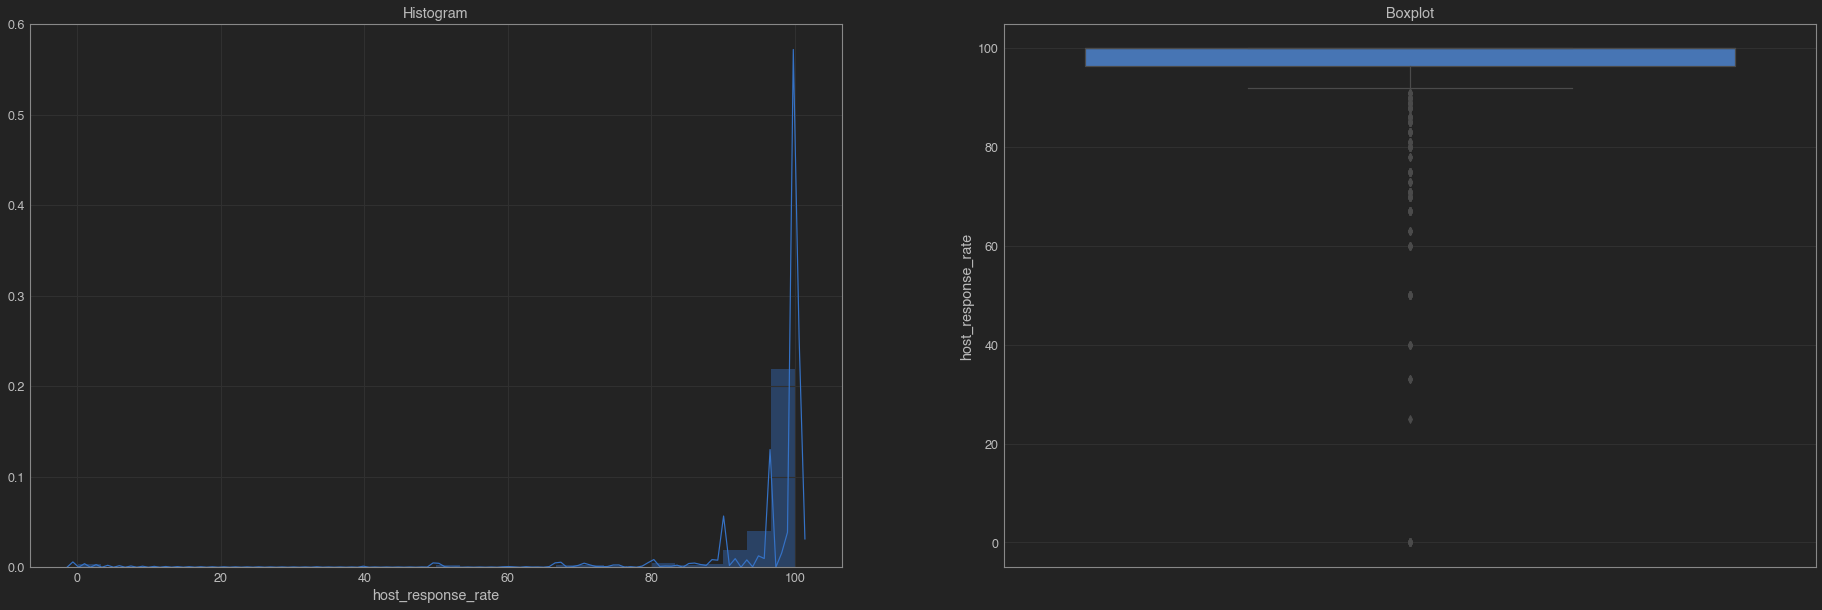

In [26]:
diagnostic_plots(airbnb,'host_response_rate')

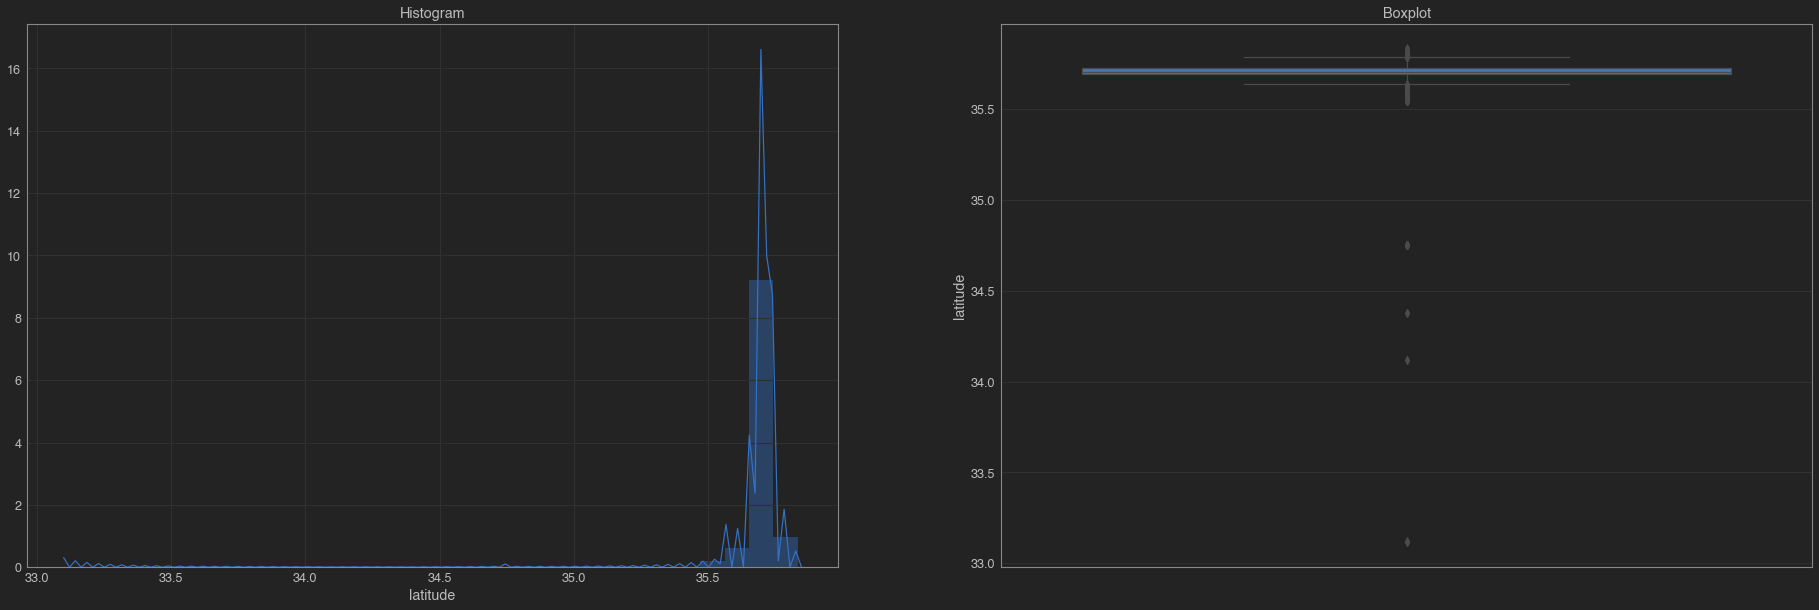

In [27]:
diagnostic_plots(airbnb,'latitude')

In [28]:
airbnb.skew()

host_id                 -0.106253
reviews_per_month        2.590106
review_scores_rating    -2.784883
availability_365        -0.162022
guests_included          2.492380
beds                     5.446727
bedrooms                13.273677
accommodates             1.645852
longitude               -2.233014
latitude               -17.016600
host_acceptance_rate    -5.328615
host_response_rate      -5.698404
price                   12.643910
security_deposit        11.368452
cleaning_fee             2.350679
extra_people             4.650069
dtype: float64

In [29]:
airbnb.shape

(7526, 28)

In [30]:
airbnb.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [31]:
airbnb.drop(['latitude','longitude'],axis=1,inplace=True)

In [32]:
airbnb.drop(['host_since'],axis=1,inplace=True)

In [33]:
airbnb.drop(['name'],axis=1,inplace=True)

# RECATEGORIZE

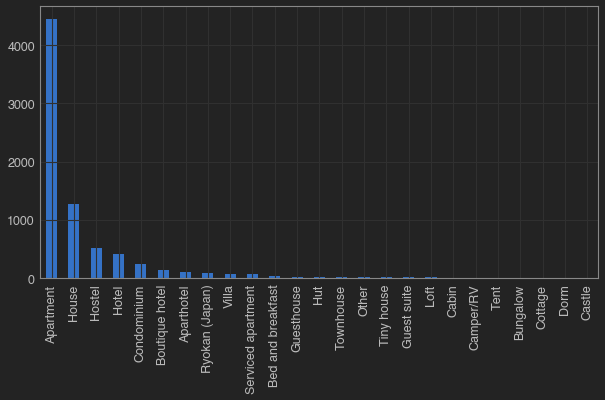

In [34]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

Berdasarkan data diatas, keberagaman property sangat banyak. Akan tetapi, ada beberapa yang bisa di kelompokkan seperti House, Townhouse, Tiny house, Guesthouse. Lalu Apartment dengan serviced apartment. Kemudian tent,camper,hut bisa dimasukkan Other. Begitupun dengan yang lain

In [35]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "House" if x=="Townhouse" or x=="Tiny house" or x=="Guesthouse" else x)

In [36]:
sum(airbnb["property_type"] == "Other")

14

In [37]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Apartment" if x=="Serviced apartment" else x)

In [38]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Bed and breakfast" else x)

In [39]:
to_other = []
for x in airbnb["property_type"].unique():
    if sum(airbnb["property_type"] == x) < sum(airbnb["property_type"] == "Other"):
        to_other.append(x)
to_other

['Guest suite',
 'Loft',
 'Tent',
 'Camper/RV',
 'Cabin',
 'Bungalow',
 'Dorm',
 'Cottage',
 'Castle']

In [40]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x in to_other else x)

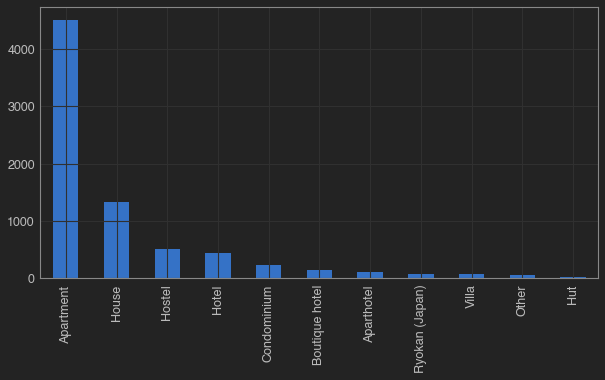

In [41]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [42]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x== "Hut" else x)

In [43]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Boutique hotel" else x)

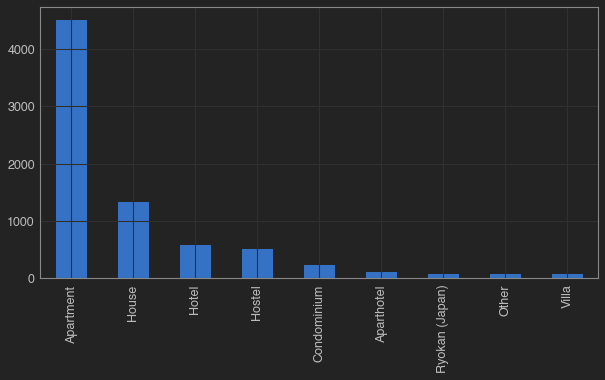

In [44]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [45]:
airbnb.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,0.18,94.0,89,1,1.0,1.0,1,100.0,96.488942,4192.0,30000.0,5000.0,0.0
5,1573631,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,House,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called and got confirmation...,f,moderate,0.52,96.0,33,1,2.0,2.0,3,92.0,100.000000,7955.0,25000.0,8000.0,550.0
6,4799233,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shinjuku Ku,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,f,moderate,1.05,90.0,172,3,4.0,1.0,3,100.0,100.000000,5160.0,0.0,3000.0,0.0
8,5596383,t,"['email', 'phone', 'reviews', 'manual_offline'...",t,Setagaya Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130001107,t,moderate,2.42,99.0,2,1,1.0,1.0,2,100.0,100.000000,6987.0,20000.0,4000.0,6000.0
10,5686404,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Adachi Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130007760,f,strict_14_with_grace_period,1.15,94.0,92,1,2.0,1.0,2,86.0,100.000000,3547.0,15000.0,2000.0,2000.0


# ENCODE
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159



In [46]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['host_id','neighbourhood_cleansed','room_type','property_type','host_identity_verified','host_is_superhost','instant_bookable'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [47]:
airbnb=airbnb_en

In [48]:
airbnb.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,0,strict_14_with_grace_period,0.18,94.0,89,1,1.0,1.0,1,100.0,96.488942,4192.0,30000.0,5000.0,0.0
5,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,1,1,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called and got confirmation...,0,moderate,0.52,96.0,33,1,2.0,2.0,3,92.0,100.000000,7955.0,25000.0,8000.0,550.0
6,2,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,2,0,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,0,moderate,1.05,90.0,172,3,4.0,1.0,3,100.0,100.000000,5160.0,0.0,3000.0,0.0
8,3,1,"['email', 'phone', 'reviews', 'manual_offline'...",0,1,1,0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130001107,1,moderate,2.42,99.0,2,1,1.0,1.0,2,100.0,100.000000,6987.0,20000.0,4000.0,6000.0
10,4,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,3,1,0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130007760,0,strict_14_with_grace_period,1.15,94.0,92,1,2.0,1.0,2,86.0,100.000000,3547.0,15000.0,2000.0,2000.0


## ORDINAL ENCODING

In [49]:
airbnb['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible', 'strict',
       'super_strict_60', 'super_strict_30'], dtype=object)

In [50]:
airbnb1=airbnb.copy()
cpdictionary = {'strict_14_with_grace_period':0,'moderate':1,'flexible':2,'strict':3,'super_strict_60':4,'super_strict_30':5}
airbnb1['cancellation'] = airbnb1.cancellation_policy.map(cpdictionary)

In [51]:
airbnb1.drop(['cancellation_policy'],axis=1,inplace=True)

In [52]:
airbnb1.head(1)

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,cancellation
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,0,0.18,94.0,89,1,1.0,1.0,1,100.0,96.488942,4192.0,30000.0,5000.0,0.0,0


# FREQUENCY ENCODING

In [53]:
airbnb1['license'].describe()

count                                                  7526
unique                                                 4597
top       Other reasons | 弊社がリスティングする物件につきましては、全て「最低30泊」...
freq                                                     58
Name: license, dtype: object

In [54]:
airbnb2 = airbnb1.copy()
frekuensi = airbnb2.groupby('license').size()/len(airbnb2)
airbnb2['license_'] = airbnb2['license'].map(frekuensi)

In [55]:
airbnb2.drop(['license'],axis=1,inplace=True)

In [56]:
airbnb2.drop(['host_verifications'],axis=1,inplace=True)

In [57]:
airbnb2.head(1)

,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,cancellation,license_
0,0,0,0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",0,0.18,94.0,89,1,1.0,1.0,1,100.0,96.488942,4192.0,30000.0,5000.0,0.0,0,0.000133


In [58]:
airbnb2.drop(['host_id','host_is_superhost','amenities','host_identity_verified','host_acceptance_rate','host_response_rate'],axis=1,inplace=True)

In [59]:
airbnb2.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,price,security_deposit,cleaning_fee,extra_people,cancellation,license_
0,0,0,0,0,0.18,94.0,89,1,1.0,1.0,1,4192.0,30000.0,5000.0,0.0,0,0.000133
5,1,1,1,0,0.52,96.0,33,1,2.0,2.0,3,7955.0,25000.0,8000.0,550.0,1,0.000266
6,2,0,1,0,1.05,90.0,172,3,4.0,1.0,3,5160.0,0.0,3000.0,0.0,1,0.000133
8,1,1,0,1,2.42,99.0,2,1,1.0,1.0,2,6987.0,20000.0,4000.0,6000.0,1,0.000133
10,3,1,0,0,1.15,94.0,92,1,2.0,1.0,2,3547.0,15000.0,2000.0,2000.0,0,0.000133


# SPLITING

In [60]:
x = airbnb2.drop('price', axis=1)
y = airbnb2['price']
# TRAIN TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [61]:
y_train.head()

8002      3547.0
9755     49987.0
9281     10642.0
12045    19947.0
3252     19947.0
Name: price, dtype: float64

In [62]:
x_train.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,security_deposit,cleaning_fee,extra_people,cancellation,license_
8002,19,0,0,1,0.540000,90.0,75,1,3.0,1.0,3,12000.000000,3300.00000,1800.0,0,0.000531
9755,19,5,0,1,1.595049,95.0,180,1,6.0,1.0,6,12235.761708,6153.62966,0.0,1,0.000133
9281,2,0,1,1,4.100000,97.0,4,1,1.0,1.0,2,0.000000,3225.00000,0.0,0,0.000133
12045,16,1,1,1,1.595049,95.0,90,10,5.0,5.0,10,0.000000,20000.00000,2000.0,2,0.000133
3252,19,0,1,1,3.020000,96.0,1,4,4.0,2.0,7,0.000000,8800.00000,1500.0,0,0.000133


# SCALING

In [63]:
scaler = RobustScaler()

In [64]:
x_train = scaler.fit_transform(x_train)

In [65]:
x_test = scaler.transform(x_test)

# LINEAR REGRESSION

In [66]:
LR =LinearRegression()
LR.fit(x_train,y_train)
y_predLR=LR.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predLR))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predLR))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predLR))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predLR)))

R2 SCORE GIO :  0.03207004202251451
MAE SCORE GIO :  15895.176473221763
MSE SCORE GIO :  2817314187.6335387
RMSE SCORE GIO :  53078.37777884267


In [67]:
LRdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predLR})
LRdata.head(10)

,Actual,Prediction
10000,13975.0,34370.101347
2417,5160.0,13744.219792
5044,13007.0,30658.857459
9496,49987.0,26693.929782
6502,32035.0,27456.708008
9345,25047.0,20001.968071
7087,12040.0,20863.276058
4911,15050.0,21190.022398
7058,4515.0,12474.311024
2432,13760.0,11760.059520


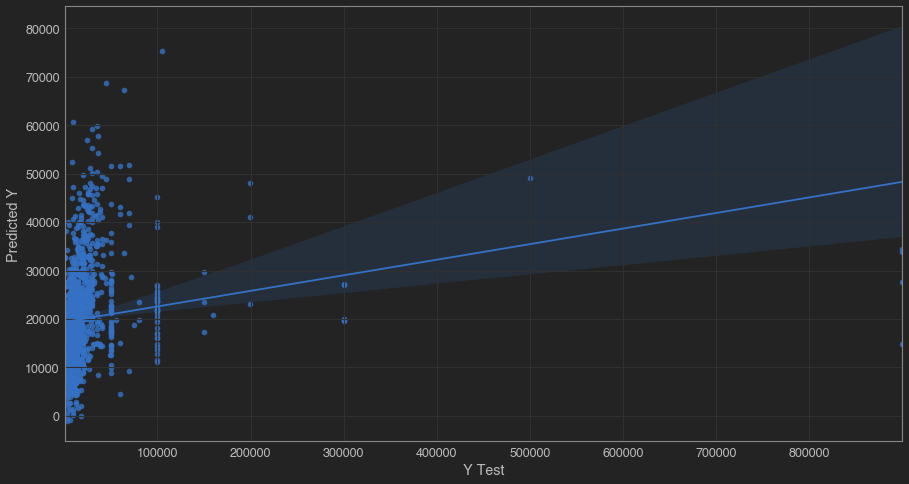

In [68]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predLR,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RIDGE

In [69]:
ridge = Ridge()
ridge.fit(x_train,y_train)
y_predridge = ridge.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predridge))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predridge))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predridge))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predridge)))

R2 SCORE GIO :  0.032068863413310944
MAE SCORE GIO :  15894.318623613854
MSE SCORE GIO :  2817317618.1632
RMSE SCORE GIO :  53078.410094530904


In [70]:
Ridgedata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predridge})
Ridgedata.head(10)

,Actual,Prediction
10000,13975.0,34366.514510
2417,5160.0,13749.764969
5044,13007.0,30658.842412
9496,49987.0,26698.643691
6502,32035.0,27456.309119
9345,25047.0,20006.973905
7087,12040.0,20862.582671
4911,15050.0,21190.159313
7058,4515.0,12474.961927
2432,13760.0,11766.154441


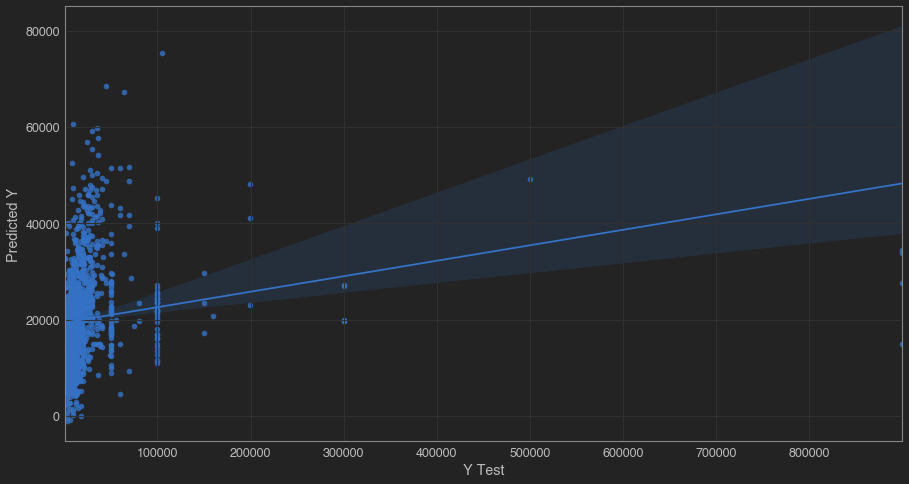

In [71]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predridge,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# ELASTIC NET

In [72]:
EN = ElasticNetCV()
EN.fit(x_train,y_train)
y_predEN = EN.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predEN))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predEN))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predEN))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predEN)))

R2 SCORE GIO :  0.014064690119732881
MAE SCORE GIO :  16307.928187595042
MSE SCORE GIO :  2869721629.8776407
RMSE SCORE GIO :  53569.78280595919


In [73]:
ENdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predEN})
ENdata.head(10)

,Actual,Prediction
10000,13975.0,23026.036000
2417,5160.0,19262.643806
5044,13007.0,24906.797904
9496,49987.0,24410.908060
6502,32035.0,22084.245961
9345,25047.0,23011.181693
7087,12040.0,20120.888484
4911,15050.0,19604.186571
7058,4515.0,16817.289451
2432,13760.0,18831.724017


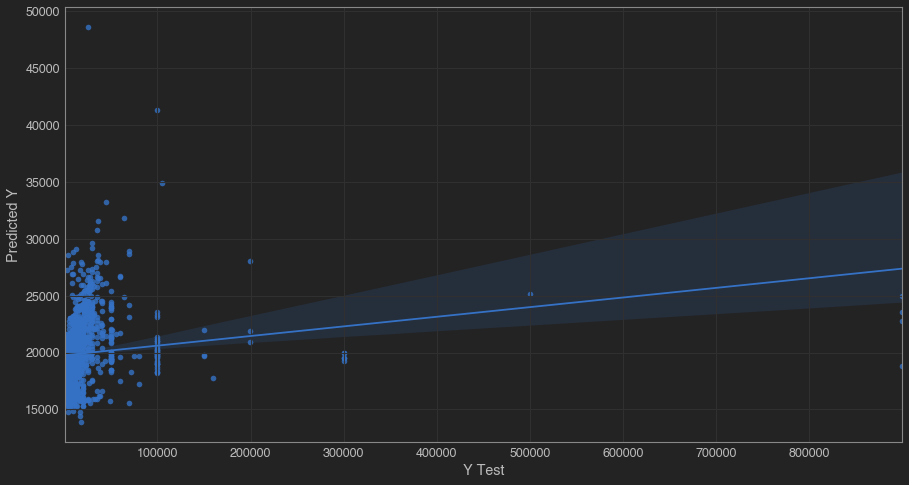

In [74]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predEN,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RANDOM FOREST

In [75]:
forest = RandomForestRegressor()
forest = forest.fit(x_train, y_train)
y_test_predf = forest.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_predf)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_predf))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_predf))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_predf))))

R2 SCORE GIO :  0.1816610787716858
MAE SCORE GIO :  12750.690605933096
MSE SCORE GIO :  2381905667.9335485
RMSE SCORE GIO :  48804.77095462644


In [76]:
print('Data ini memiliki harga terkecil {} dan harga terbesar {}.'.format(airbnb2['price'].min(),airbnb2['price'].max()))

Data ini memiliki harga terkecil 1075.0 dan harga terbesar 1000040.0.


In [77]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_predf})
RFdata.head(10)

,Actual,Prediction
10000,13975.0,26350.12
2417,5160.0,13900.28
5044,13007.0,25876.93
9496,49987.0,40855.47
6502,32035.0,24536.33
9345,25047.0,36353.29
7087,12040.0,13306.58
4911,15050.0,15730.81
7058,4515.0,9218.26
2432,13760.0,9659.87


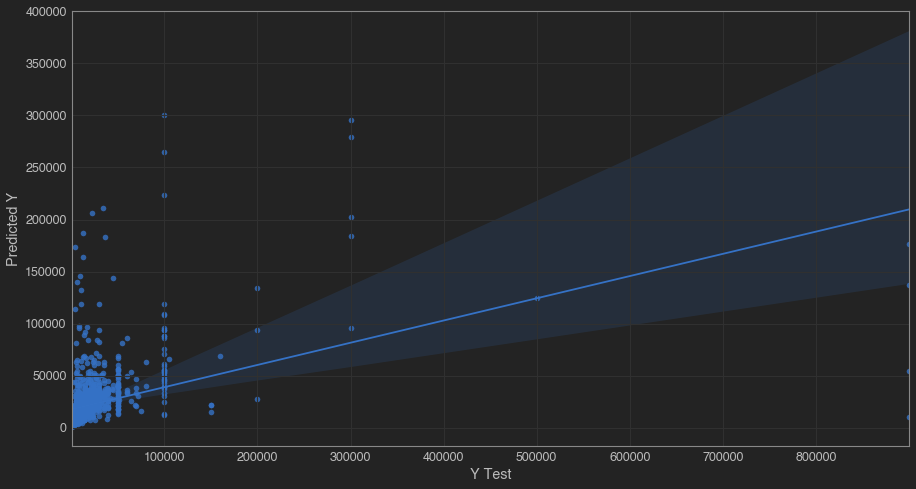

In [78]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_predf,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# GRADIENT BOOST

In [79]:
gradient = GradientBoostingRegressor()
gradient = gradient.fit(x_train, y_train)
y_train_g = gradient.predict(x_train)
y_test_g = gradient.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_g)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_g))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_g))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_g))))

R2 SCORE GIO :  0.05174261823462378
MAE SCORE GIO :  14140.249662542432
MSE SCORE GIO :  2760054023.7003064
RMSE SCORE GIO :  52536.21630551925


In [80]:
gradientdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_g})
gradientdata.head(5)

,Actual,Prediction
10000,13975.0,23793.396975
2417,5160.0,10659.290742
5044,13007.0,28001.064508
9496,49987.0,27471.163912
6502,32035.0,27588.615117


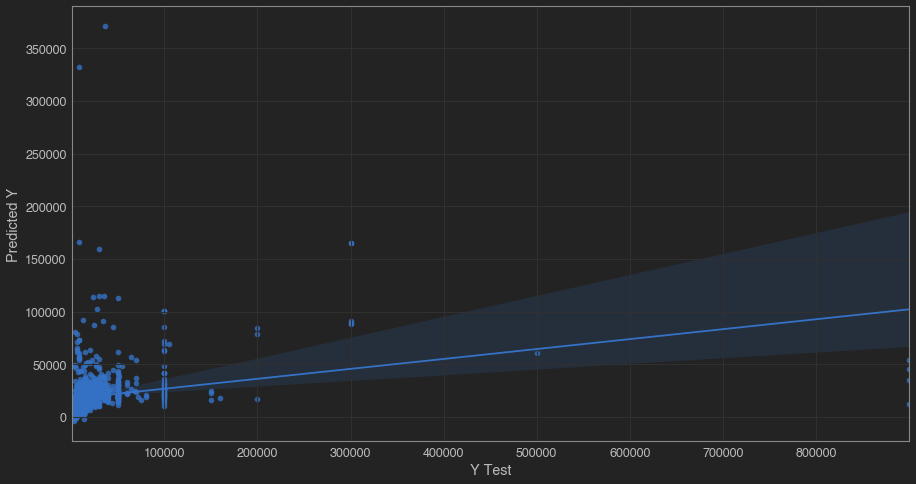

In [81]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_g,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNeighborsRegressor

In [82]:
KNN = KNeighborsRegressor()
KNN = KNN.fit(x_train, y_train)
y_train_K = KNN.predict(x_train)
y_test_K = KNN.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_K)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_K))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_K))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_K))))

R2 SCORE GIO :  0.12370052056943781
MAE SCORE GIO :  12429.621381142097
MSE SCORE GIO :  2550609096.937397
RMSE SCORE GIO :  50503.55529007237


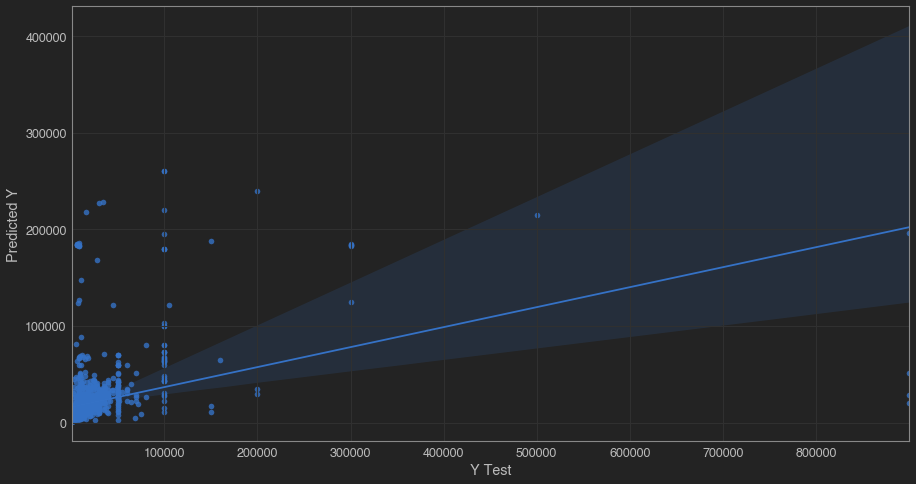

In [83]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_K,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGBRegressor

In [84]:
xgb = XGBRegressor()
xgb = xgb.fit(x_train, y_train)
y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_xgb)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_xgb))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_xgb))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_xgb))))

R2 SCORE GIO :  0.1549144396950617
MAE SCORE GIO :  15116.218724457232
MSE SCORE GIO :  2459756017.6629243
RMSE SCORE GIO :  49595.927430212694


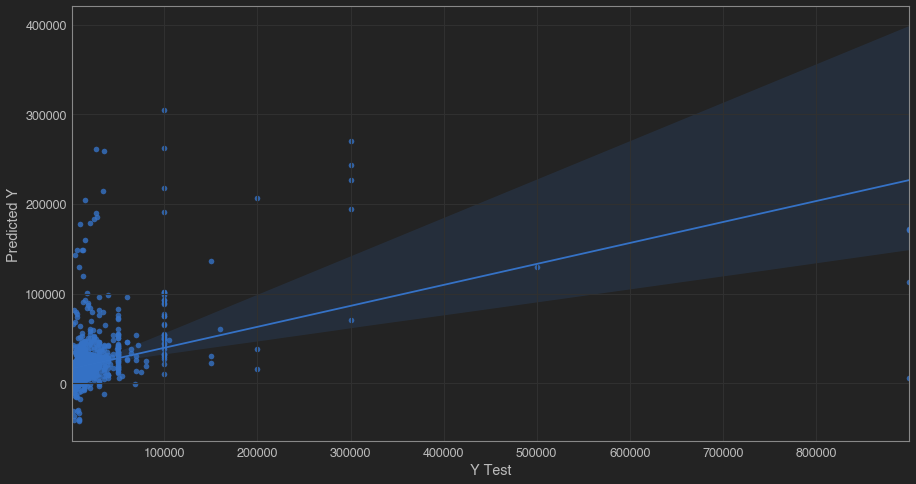

In [85]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_xgb,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()